In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/Users/piyush/projects/ViDA-SSL/")

In [3]:
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.io import load_json, load_txt

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [34]:
train_split_file = "/Users/piyush/projects/ViDA-SSL/data/UCF-101/splits/ucfTrainTestlist/trainlist01.txt"
test_split_file = "/Users/piyush/projects/ViDA-SSL/data/UCF-101/splits/ucfTrainTestlist/testlist01.txt"

In [42]:
class_to_label = dict(zip([x.split("/")[0] for x in train_files], train_labels))

In [43]:
train_split = load_txt(train_split_file)
train_files = [x.split(" ")[0] for x in train_split]
train_labels = [x.split(" ")[-1] for x in train_split]

test_split = load_txt(test_split_file)
test_files = [x.split(" ")[0] for x in test_split]
# test_labels = [x.split(" ")[-1] for x in test_split]
test_labels = [class_to_label[x.split("/")[0]] for x in test_files]

In [44]:
len(train_labels), len(test_labels)

(9537, 3783)

In [47]:
files = train_files + test_files
labels = train_labels + test_labels

In [48]:
df = pd.DataFrame(None)
df["file"] = files
df["label"] = labels

In [49]:
df.head()

,file,label
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi,1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi,1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi,1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi,1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi,1


### Label distribution

In [52]:
sort_df = df.iloc[(-df.groupby('label').label.transform('size')).argsort(kind='mergesort')]

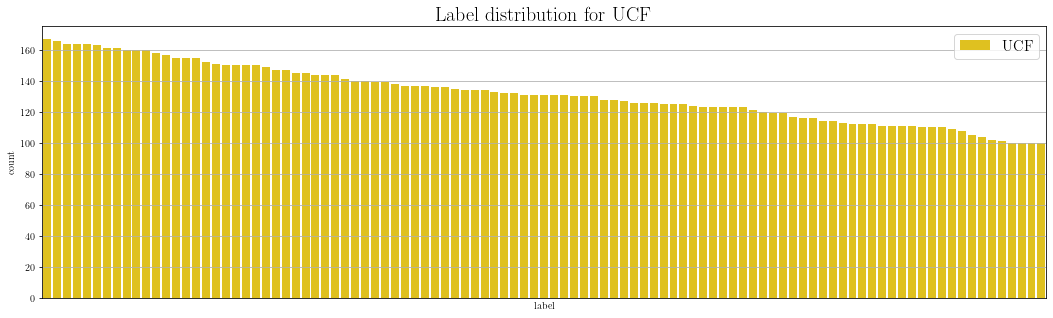

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.grid()
sns.countplot(data=sort_df, x=f"label", ax=ax, label="UCF", color="gold")
ax.set_title("Label distribution for UCF", fontsize=20)
ax.legend(fontsize=15)
ax.set_xticks([])

plt.show()